In [1]:
import pandas as pd
import DB as db

In [ ]:
df = pd.read_csv('.\\out\\log_df.csv')
df.head(10)

In [ ]:
pd.to_datetime(df['log_date']).dt.date  
# pd.Timestamp(df['log_date'])
# x.dt.date
# x.week
# y

In [16]:
conn, cursor = db.open_db()
cmd = """
select * from 
(select dt, sum(line_no) '# logins' from log_stats where token = 'login True' group by dt)
left join
(select dt, sum(line_no) '# email quota errors' from log_stats where token = 'MailSendException' group by dt)
using (dt)
"""
df = pd.read_sql(cmd, conn)
cursor.close()


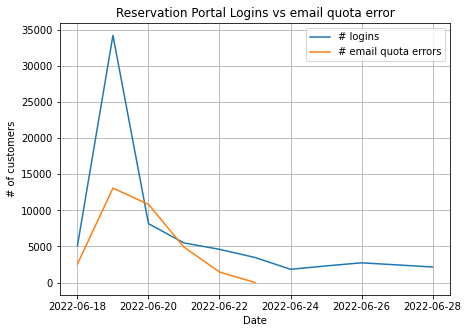

In [21]:
fig = df.plot(x='dt', y=['# logins', '# email quota errors'], title = 'Reservation Portal Logins vs email quota error', 
kind = 'line', 
grid=True,
xlabel = 'Date', ylabel = '# of customers', figsize = (7,5))#.get_figure()

# fig.savefig(r'.\out\email quota.jpg')

In [28]:
stats_all.columns

Index(['index', 'dt', 'token', 'categ', 'line_no'], dtype='object')

In [ ]:
logins = stats_all[stats_all.token == 'Login Success']
logins.rename({'line_no':'# logins'}, inplace= True)
emails_errors = stats_all[stats_all.token == 'MailSendException']
emails_errors.rename({'line_no':'# email sending failiure'}, inplace= True)
plt_data = pd.concat([logins, emails_errors], axis = 'columns', keys=['dt'])
plt_data
# plt_data.plot(x='dt')

In [ ]:
# stats
# stats = pd.DataFrame()
# stats = stats_all[['dt', 'line_no']]
# stats['login'] = 
# stats_all[['dt', 'line_no']].loc[[stats_all['token'] == 'Login Success']]
# stats_all[stats_all['token'] == 'Login Success']
# stats['eMail Send Quota'] = stats_all[stats_all.token == 'MailSendException']
# stats['dt'] = stats_all.dt
stats_all[stats_all.token == 'Login Success'].plot(x='dt', y='line_no')
stats_all[stats_all.token == 'MailSendException'].plot(x='dt', y='line_no')
# stats.plot(x='dt', y='line_no')
# stats
